In [35]:
import numpy as np
import pandas as pd
from datetime import date
from pyxirr import xirr
from scipy.optimize import newton
import matplotlib.pyplot as plt

<h3>
<font color=blue>Extended Internal Rate of Return (XIRR)</font>
</h3>

The XIRR (eXtended Internal Rate of Return) is used to indicate the return on an investment that has multiple cash flows occurring at irregular intervals. While the IRR calculation ignores the timing of the cash flows, the XIRR requires the timing of the cash flows.


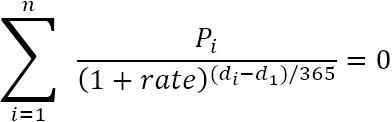


In [2]:
cashflows = [-2000, 1000, 800, 1100]
dates     = [date(2018,1,1), date(2019,1,10), date(2019, 10, 31), date(2021, 1, 15)]

In [48]:
days_elapsed = [(dt-dates[0]).days for dt in dates]
days_elapsed

[0, 374, 668, 1110]

In [49]:
df = pd.DataFrame(zip(cashflows, dates, days_elapsed), columns=['cashflow', 'date', 'days_elapsed'])

In [50]:
df

,cashflow,date,days_elapsed
0,-2000,2018-01-01,0
1,1000,2019-01-10,374
2,800,2019-10-31,668
3,1100,2021-01-15,1110


<h3>
    Deriving XIRR using <font color=blue> xirr </font> method of <font color=blue> pyxirr </font> module

In [51]:
xirr_rate = xirr(df.date,df.cashflow)
xirr_rate

0.21098233503367922

In [52]:
def getXIRR(rate) :
    npv =  sum([cf/(1+rate)**(days/365) for days, cf in zip(df.days_elapsed, df.cashflow)])
    return npv

In [53]:
newton_rate= newton(getXIRR,.02)
newton_rate

0.21098233503354757

In [54]:
discount_list = []
npv_list = []
for rate in np.arange(0.10000, .30000, .00001) :
    npv = sum([cf/(1+rate)**(days/365) for days, cf in zip(df.days_elapsed, df.cashflow)])
    discount_list.append(rate)
    npv_list.append(npv)
    if npv < 0.001 :
        break

In [55]:
print(f'last 2 elements of the discount list {discount_list[-1:-3:-1]}')
print(f'last 2 elements of the npv list {npv_list[-1:-3:-1]}')

last 2 elements of the discount list [0.210989999999957, 0.21097999999995698]
last 2 elements of the npv list [-0.023687852498369466, 0.007216297701802432]


In [56]:
discount_list[-2], npv_list[-2]

(0.21097999999995698, 0.007216297701802432)

In [57]:
df_xirr=pd.DataFrame(zip(discount_list, npv_list), columns = ['discount', 'npv'])
pd.set_option('display.max_rows', 1000)
df_xirr

,discount,npv
0,0.10000,402.120549
1,0.10001,402.078162
2,0.10002,402.035777
3,0.10003,401.993394
4,0.10004,401.951011
...,...,...
11095,0.21095,0.099934
11096,0.21096,0.069027
11097,0.21097,0.038121
11098,0.21098,0.007216


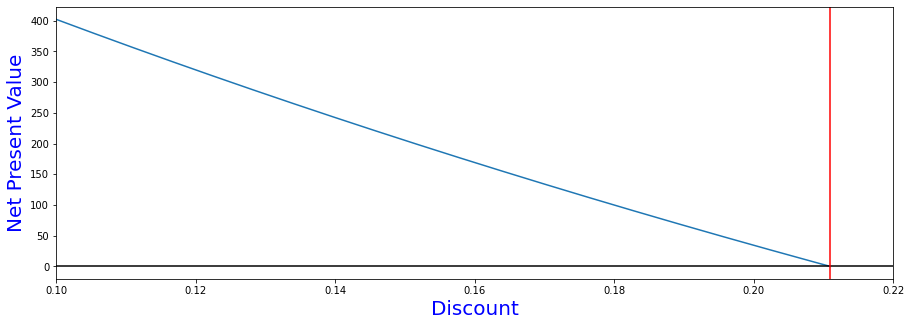

In [58]:
plt.figure(figsize=(15,5))
plt.xlim(.1,.22,.2)
plt.plot(discount_list, npv_list)
plt.axhline(0, color='k')
plt.ylabel('Net Present Value', c='b',size=20 )
plt.xlabel('Discount', c='b', size=20)
plt.axvline(discount_list[-2], color='r')
plt.show()

In [19]:
df_xirr.tail()

,discount,npv
11095,0.21095,0.099934
11096,0.21096,0.069027
11097,0.21097,0.038121
11098,0.21098,0.007216
11099,0.21099,-0.023688


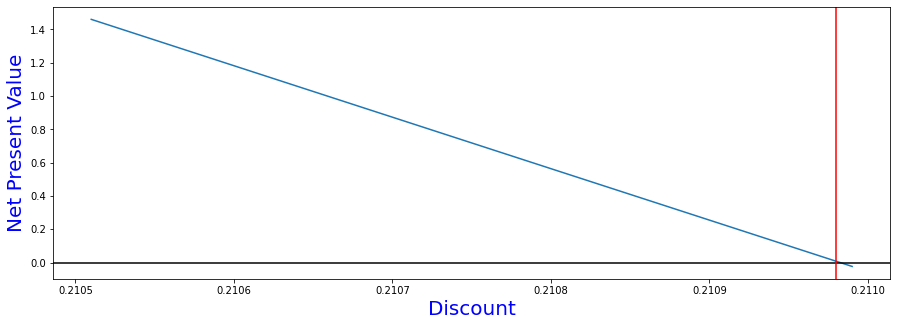

In [20]:
plt.figure(figsize=(15,5))
plt.plot(discount_list[-1:-50:-1], npv_list[-1:-50:-1])
plt.axhline(0, color='k')
plt.ylabel('Net Present Value', c='b',size=20 )
plt.xlabel('Discount', c='b', size=20)
plt.axvline(discount_list[-2], color='r')
plt.show()